In [1]:
# Importing  required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import re


In [2]:
# keeping the cities we want in list format
cities=["Bangalore","Hyderabad","Chennai","Mumbai","Pune","Delhi","Kolkata"]

In [178]:
# coding part
title=[]
specification=[]
exp=[]
area=[]
fee=[]
reviews=[]
stories=[]
availability=[]
Location=[]
Hospital=[]

urls=["https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22pediatrician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22gynecologist%2Fobstetrician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22cardiologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22fixed%20prosthodontics%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22implantologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22ayurveda%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22psychologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22audiologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22speech%20therapist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22dietitian%2Fnutritionist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/clinics?results_type=clinic&q=%5B%7B%22word%22%3A%22clinikk%20health%20hub%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22practice_group%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22nerves%20surgery%20specialist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22common_name%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22pre%20prosthetic%20surgery%20(rigid%20reconstruction)%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22alopecia%20areta%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22gall%20bladder%20(biliary)%20stone%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22immunity%20therapy%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22child%20occupational%20therapist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22common_name%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22chickenpox%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22chickenpox%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/procedure?results_type=doctor&q=%5B%7B%22word%22%3A%22epistaxis%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22procedure%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22tailbone%20pain%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/procedure?results_type=doctor&q=%5B%7B%22word%22%3A%22root%20canal%20treatment%20(rct)%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22procedure%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22scleral%20contact%20lens%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22rectal%20abscess%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22mental%20health%20doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22common_name%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22cardiac%20rehabilitation%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22skin%20care%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22skin%20whitening%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22hair%20loss%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/procedure?results_type=doctor&q=%5B%7B%22word%22%3A%22hair%20transplant%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22procedure%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22damon%20system%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22ocular%20manifestation%20of%20disease%20sintemica%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22spheroid%20body%20myopathy%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doppler%20scan%20in%20pregnancy%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22vaginal%20infection%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/procedure?results_type=doctor&q=%5B%7B%22word%22%3A%22facet%20joint%20injections%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22procedure%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22joints%20and%20musculoskeletal%20disorders%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}"]

      
for i in urls:
    for j in cities:
        url=i.format(j)
        page=requests.get(url)
        soup=BeautifulSoup(page.text)
        for x in soup.find_all("div",class_="u-border-general--bottom"):# Container
            Doctor_title=x.find("h2",class_="doctor-name")
            Doctor_specification=x.find("div",class_="u-grey_3-text")
            experience=x.find("div",{'class':"uv2-spacer--xs-top",'data-qa-id':'doctor_experience'})
            city=x.find("span",{'data-qa-id':'practice_locality'})
            fees=x.find("span",{'data-qa-id':"consultation_fee"})
            patient_reviews=x.find("span",class_="o-label--success u-bold")
            patient_stories=x.find("span",class_="u-bold u-t-underline")
            Doctor_availability=x.find("span",{'class':'u-color--green u-bold','data-qa-id':'availability_text'})
            Doctor_Location=x.find("span",{'class':'u-t-capitalize','data-qa-id':'practice_city'})
            Hospital_name=x.find("span",{'class':'u-c-pointer u-t-hover-underline','data-qa-id':'doctor_clinic_name'})

            if Doctor_title is None:
                title.append(np.nan)
            else:
                title.append(Doctor_title.text)
            if Doctor_specification is None:
                specification.append(np.nan)
            else:
                specification.append(Doctor_specification.text)
            if experience is None:
                exp.append(np.nan)
            else:
                exp.append(experience.text)
            if city is None:
                area.append(np.nan)
            else:
                area.append(city.text)
            if fees is None:
                fee.append(np.nan)
            else:
                fee.append(fees.text)
            if patient_reviews is None:
                reviews.append(np.nan)
            else:
                reviews.append(patient_reviews.text)
            if patient_stories is None:
                stories.append(np.nan)
            else:
                stories.append(patient_stories.text)
            if Doctor_availability is None:
                availability.append(np.nan)
            else:
                availability.append(Doctor_availability.text)
            if Doctor_Location is None:
                Location.append(np.nan)
            else:
                Location.append(Doctor_Location.text)
            if Hospital_name is None:
                Hospital.append(np.nan)
            else:
                Hospital.append(Hospital_name.text)
                
# Checking the length of Each Column in a Program
print("title----->",len(title))
print("specification--->",len(specification))
print("exp------>",len(exp))
print("area---->",len(area))
print("fee---->",len(fee))
print("reviews---->",len(reviews))
print("stories---->",len(stories))
print("availability--->",len(availability))
print("Location------>",len(Location))
print("Hospital--->",len(Hospital))

                

title-----> 2855
specification---> 2855
exp------> 2855
area----> 2855
fee----> 2855
reviews----> 2855
stories----> 2855
availability---> 2855
Location------> 2855
Hospital---> 2855


In [179]:
# Sample Data Frame
df=pd.DataFrame({"Name":title,"Specialization":specification,"Experience":exp,"Hospital_name":Hospital,"Area":area,"City":Location,"Consultation_Fee":fee,"Doctor_Availability":availability,"Recommondations":reviews,"No_Of_Stories":stories})

In [180]:
df

,Name,Specialization,Experience,Hospital_name,Area,City,Consultation_Fee,Doctor_Availability,Recommondations,No_Of_Stories
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dr. Deepak Devakar,Dermatologist19 years experience overall,19 years experience overall,Dermasculpt Hair Transplant and Skin Clinic,"JP Nagar,",Bangalore,₹600,Available Today,98%,580 Patient Stories
2,Dr. Vignessh Raj,Dermatologist16 years experience overall,16 years experience overall,Dr. RAJ's Centre for Skin & Hair,"Whitefield,",Bangalore,₹700,Available Today,98%,286 Patient Stories
3,Dr. Neelima Sharma,Dermatologist24 years experience overall,24 years experience overall,Manipal Hospital,"Jayanagar 9 Block,",Bangalore,₹650,Available Today,95%,27 Patient Stories
4,Dr. Parthasarathi Dutta Roy,Dermatologist20 years experience overall,20 years experience overall,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,"MG Road,",Bangalore,₹700,Available Today,89%,1314 Patient Stories
...,...,...,...,...,...,...,...,...,...,...
2850,Dr. Chayan Kumar Roy,General Physician28 years experience overall,28 years experience overall,Rameswara Nursing Home,"Ultadanga,",Kolkata,₹800,Available Today,100%,NaN
2851,Dr. Dipayan Das,Homoeopath12 years experience overall,12 years experience overall,The Healers,"Garia,",Kolkata,₹600,NaN,90%,18 Patient Stories
2852,Dr. Shyama Prasad Roy,General Physician37 years experience overall,37 years experience overall,Binapani Doctor's Chamber,"Jadavpur,",Kolkata,₹700,Available Today,79%,8 Patient Stories
2853,Dr. Sandip Rungta,General Physician23 years experience overall,23 years experience overall,Mansa Sheel,"Beadon Street,",Kolkata,₹700,Available Today,99%,312 Patient Stories


In [18]:
# #df.to_csv("practo_project.csv")

In [181]:
# df = pd.read_csv("practo_project.csv",index_col=0)
# df.head()

# Data Cleaning

In [182]:
# Checking the Entire Information About the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 2498 non-null   object
 1   Specialization       2607 non-null   object
 2   Experience           2498 non-null   object
 3   Hospital_name        2498 non-null   object
 4   Area                 2498 non-null   object
 5   City                 2498 non-null   object
 6   Consultation_Fee     2278 non-null   object
 7   Doctor_Availability  1254 non-null   object
 8   Recommondations      2341 non-null   object
 9   No_Of_Stories        2270 non-null   object
dtypes: object(10)
memory usage: 223.2+ KB


In [183]:
# Checking the null values before process starts
df.isnull().sum()

Name                    357
Specialization          248
Experience              357
Hospital_name           357
Area                    357
City                    357
Consultation_Fee        577
Doctor_Availability    1601
Recommondations         514
No_Of_Stories           585
dtype: int64

In [217]:
# filling the null values 
df["Doctor_Availability"].fillna(df["Doctor_Availability"].mode()[0],inplace=True)

In [218]:
df["Recommondations"].fillna(df["Recommondations"].mode()[0],inplace = True)

In [219]:
df["No_Of_Stories"].fillna(df["No_Of_Stories"].mode()[0],inplace= True)

In [220]:
df["Consultation_Fee"].fillna(df["Consultation_Fee"].mode()[0],inplace= True)

In [221]:
df["Experience"].fillna(df["Experience"].mode()[0],inplace= True)

In [224]:
# checking any null values
df.isnull().sum()

Name                   357
Specialization         248
Experience               0
Hospital_name          357
Area                   357
City                   357
Consultation_Fee         0
Doctor_Availability      0
Recommondations          0
No_Of_Stories            0
dtype: int64

In [223]:
# Dropping all null values in the sample dataframe
df1=df.dropna(subset=["Name","Specialization","Area","City","Hospital_name"])

In [225]:
df1

,Name,Specialization,Experience,Hospital_name,Area,City,Consultation_Fee,Doctor_Availability,Recommondations,No_Of_Stories
1,Dr. Deepak Devakar,Dermatologist19 years experience overall,19 years experience overall,Dermasculpt Hair Transplant and Skin Clinic,"JP Nagar,",Bangalore,₹600,Available Today,98%,580 Patient Stories
2,Dr. Vignessh Raj,Dermatologist16 years experience overall,16 years experience overall,Dr. RAJ's Centre for Skin & Hair,"Whitefield,",Bangalore,₹700,Available Today,98%,286 Patient Stories
3,Dr. Neelima Sharma,Dermatologist24 years experience overall,24 years experience overall,Manipal Hospital,"Jayanagar 9 Block,",Bangalore,₹650,Available Today,95%,27 Patient Stories
4,Dr. Parthasarathi Dutta Roy,Dermatologist20 years experience overall,20 years experience overall,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,"MG Road,",Bangalore,₹700,Available Today,89%,1314 Patient Stories
5,Dr. Jyothi Menon,Dermatologist22 years experience overall,22 years experience overall,Oliva Skin & Hair Clinic,"Koramangala 7 Block,",Bangalore,₹600,Available Today,96%,33 Patient Stories
...,...,...,...,...,...,...,...,...,...,...
2850,Dr. Chayan Kumar Roy,General Physician28 years experience overall,28 years experience overall,Rameswara Nursing Home,"Ultadanga,",Kolkata,₹800,Available Today,100%,1 Patient Story
2851,Dr. Dipayan Das,Homoeopath12 years experience overall,12 years experience overall,The Healers,"Garia,",Kolkata,₹600,Available Today,90%,18 Patient Stories
2852,Dr. Shyama Prasad Roy,General Physician37 years experience overall,37 years experience overall,Binapani Doctor's Chamber,"Jadavpur,",Kolkata,₹700,Available Today,79%,8 Patient Stories
2853,Dr. Sandip Rungta,General Physician23 years experience overall,23 years experience overall,Mansa Sheel,"Beadon Street,",Kolkata,₹700,Available Today,99%,312 Patient Stories


In [243]:
# using lambda to replace in consultation fee column
fee = df1["Consultation_Fee"].apply(lambda x:x.replace('₹','').replace('Free Consultation',"0"))
fee

1       600
2       700
3       650
4       700
5       600
       ... 
2850    800
2851    600
2852    700
2853    700
2854    800
Name: Consultation_Fee, Length: 2498, dtype: object

In [227]:
# using lambda to replace in experience column
exp = df1["Experience"].apply(lambda x:x.replace("years experience overall",""))
exp

1       19 
2       16 
3       24 
4       20 
5       22 
       ... 
2850    28 
2851    12 
2852    37 
2853    23 
2854    21 
Name: Experience, Length: 2498, dtype: object

In [228]:
# using lambda to replace in recommandations column
rate = df1["Recommondations"].apply(lambda x:x.replace("%",""))
rate

1        98 
2        98 
3        95 
4        89 
5        96 
        ... 
2850    100 
2851     90 
2852     79 
2853     99 
2854     97 
Name: Recommondations, Length: 2498, dtype: object

In [229]:
# using lambda to replace in patient stories column
stories = df1["No_Of_Stories"].apply(lambda x:x.replace("Patient Stories","").replace("Patient Story",""))
stories

1        580 
2        286 
3         27 
4       1314 
5         33 
        ...  
2850       1 
2851      18 
2852       8 
2853     312 
2854      20 
Name: No_Of_Stories, Length: 2498, dtype: object

In [230]:
# removing (,) in  area column by using lambda
are=df1['Area'].apply(lambda x:x.replace(",",''))
are

1                  JP Nagar
2                Whitefield
3         Jayanagar 9 Block
4                   MG Road
5       Koramangala 7 Block
               ...         
2850              Ultadanga
2851                  Garia
2852               Jadavpur
2853          Beadon Street
2854           Jodhpur Park
Name: Area, Length: 2498, dtype: object

In [231]:
# Regex for Doctor_availability
avail=df1['Doctor_Availability'].apply(lambda x:x.replace("Available",''))
avail

1        Today
2        Today
3        Today
4        Today
5        Today
         ...  
2850     Today
2851     Today
2852     Today
2853     Today
2854     Today
Name: Doctor_Availability, Length: 2498, dtype: object

In [232]:
# Specialization regex
spc=df1["Specialization"].apply(lambda x: str(re.findall("Dentist|Gynecologist\/Obstetrician|General Physician|Ear-Nose-Throat \(ENT\)|Ayurveda|Dermatologist|Homoeopath",str(x))).replace('[',"").replace(']',"").replace("'",""))
spc

1           Dermatologist
2           Dermatologist
3           Dermatologist
4           Dermatologist
5           Dermatologist
              ...        
2850    General Physician
2851           Homoeopath
2852    General Physician
2853    General Physician
2854                     
Name: Specialization, Length: 2498, dtype: object

In [233]:
# printing Hospital_name column
hsp=df1['Hospital_name']
hsp

1             Dermasculpt Hair Transplant and Skin Clinic
2                        Dr. RAJ's Centre for Skin & Hair
3                                        Manipal Hospital
4       Dr. Partha Sarathi's Asian Hair and Skin Hospi...
5                                Oliva Skin & Hair Clinic
                              ...                        
2850                               Rameswara Nursing Home
2851                                          The Healers
2852                            Binapani Doctor's Chamber
2853                                          Mansa Sheel
2854                        Ashok Polyclinic Nursing Home
Name: Hospital_name, Length: 2498, dtype: object

In [234]:
# printing City column
pla=df1['City']
pla

1       Bangalore
2       Bangalore
3       Bangalore
4       Bangalore
5       Bangalore
          ...    
2850      Kolkata
2851      Kolkata
2852      Kolkata
2853      Kolkata
2854      Kolkata
Name: City, Length: 2498, dtype: object

In [235]:
# printing the names column
na = df1["Name"]
na

1                Dr. Deepak Devakar
2                  Dr. Vignessh Raj
3                Dr. Neelima Sharma
4       Dr. Parthasarathi Dutta Roy
5                  Dr. Jyothi Menon
                   ...             
2850           Dr. Chayan Kumar Roy
2851                Dr. Dipayan Das
2852          Dr. Shyama Prasad Roy
2853              Dr. Sandip Rungta
2854          Dr. Bappaditya Sarkar
Name: Name, Length: 2498, dtype: object

In [244]:
# After Cleaning the Data Storing the Values In a Another Data Frame
# Sample 01 Data Frame
df2=pd.DataFrame({"Names":na,"Specialization":spc,"Experience":exp,"Hospital_Name":hsp,"Area":are,'City':pla,"Consultation_Fee":fee,"Doctor_recommondations":rate,"Patient_Stories":stories,"Doctor_availability":avail})

In [245]:
df2

,Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fee,Doctor_recommondations,Patient_Stories,Doctor_availability
1,Dr. Deepak Devakar,Dermatologist,19,Dermasculpt Hair Transplant and Skin Clinic,JP Nagar,Bangalore,600,98,580,Today
2,Dr. Vignessh Raj,Dermatologist,16,Dr. RAJ's Centre for Skin & Hair,Whitefield,Bangalore,700,98,286,Today
3,Dr. Neelima Sharma,Dermatologist,24,Manipal Hospital,Jayanagar 9 Block,Bangalore,650,95,27,Today
4,Dr. Parthasarathi Dutta Roy,Dermatologist,20,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,MG Road,Bangalore,700,89,1314,Today
5,Dr. Jyothi Menon,Dermatologist,22,Oliva Skin & Hair Clinic,Koramangala 7 Block,Bangalore,600,96,33,Today
...,...,...,...,...,...,...,...,...,...,...
2850,Dr. Chayan Kumar Roy,General Physician,28,Rameswara Nursing Home,Ultadanga,Kolkata,800,100,1,Today
2851,Dr. Dipayan Das,Homoeopath,12,The Healers,Garia,Kolkata,600,90,18,Today
2852,Dr. Shyama Prasad Roy,General Physician,37,Binapani Doctor's Chamber,Jadavpur,Kolkata,700,79,8,Today
2853,Dr. Sandip Rungta,General Physician,23,Mansa Sheel,Beadon Street,Kolkata,700,99,312,Today


In [238]:
# checking the null values
df2.isnull().sum()

Names                     0
Specialization            0
Experience                0
Hospital_Name             0
Area                      0
City                      0
Consultation_Fee          0
Doctor_recommondations    0
Patient_Stories           0
Doctor_availability       0
dtype: int64

In [246]:
#df2.to_csv("practo_inprogress.csv")

In [247]:
# displaying the new dataframe
df3 = pd.read_csv("practo_inprogress.csv",index_col=0)
df3

,Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fee,Doctor_recommondations,Patient_Stories,Doctor_availability
1,Dr. Deepak Devakar,Dermatologist,19,Dermasculpt Hair Transplant and Skin Clinic,JP Nagar,Bangalore,600,98,580,Today
2,Dr. Vignessh Raj,Dermatologist,16,Dr. RAJ's Centre for Skin & Hair,Whitefield,Bangalore,700,98,286,Today
3,Dr. Neelima Sharma,Dermatologist,24,Manipal Hospital,Jayanagar 9 Block,Bangalore,650,95,27,Today
4,Dr. Parthasarathi Dutta Roy,Dermatologist,20,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,MG Road,Bangalore,700,89,1314,Today
5,Dr. Jyothi Menon,Dermatologist,22,Oliva Skin & Hair Clinic,Koramangala 7 Block,Bangalore,600,96,33,Today
...,...,...,...,...,...,...,...,...,...,...
2850,Dr. Chayan Kumar Roy,General Physician,28,Rameswara Nursing Home,Ultadanga,Kolkata,800,100,1,Today
2851,Dr. Dipayan Das,Homoeopath,12,The Healers,Garia,Kolkata,600,90,18,Today
2852,Dr. Shyama Prasad Roy,General Physician,37,Binapani Doctor's Chamber,Jadavpur,Kolkata,700,79,8,Today
2853,Dr. Sandip Rungta,General Physician,23,Mansa Sheel,Beadon Street,Kolkata,700,99,312,Today


In [248]:
# Removing the outliers
df4=df3.dropna(subset=["Names","Specialization","Experience","Hospital_Name","Area","City","Consultation_Fee","Doctor_recommondations","Patient_Stories","Doctor_availability"])

In [249]:
df4

,Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fee,Doctor_recommondations,Patient_Stories,Doctor_availability
1,Dr. Deepak Devakar,Dermatologist,19,Dermasculpt Hair Transplant and Skin Clinic,JP Nagar,Bangalore,600,98,580,Today
2,Dr. Vignessh Raj,Dermatologist,16,Dr. RAJ's Centre for Skin & Hair,Whitefield,Bangalore,700,98,286,Today
3,Dr. Neelima Sharma,Dermatologist,24,Manipal Hospital,Jayanagar 9 Block,Bangalore,650,95,27,Today
4,Dr. Parthasarathi Dutta Roy,Dermatologist,20,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,MG Road,Bangalore,700,89,1314,Today
5,Dr. Jyothi Menon,Dermatologist,22,Oliva Skin & Hair Clinic,Koramangala 7 Block,Bangalore,600,96,33,Today
...,...,...,...,...,...,...,...,...,...,...
2849,Dr. Shahid Shaikh,Homoeopath,18,Dr Batra's Positive Health Clinic Pvt Ltd,Salt Lake,Kolkata,450,100,1,Today
2850,Dr. Chayan Kumar Roy,General Physician,28,Rameswara Nursing Home,Ultadanga,Kolkata,800,100,1,Today
2851,Dr. Dipayan Das,Homoeopath,12,The Healers,Garia,Kolkata,600,90,18,Today
2852,Dr. Shyama Prasad Roy,General Physician,37,Binapani Doctor's Chamber,Jadavpur,Kolkata,700,79,8,Today


In [250]:
df4.isnull().sum()

Names                     0
Specialization            0
Experience                0
Hospital_Name             0
Area                      0
City                      0
Consultation_Fee          0
Doctor_recommondations    0
Patient_Stories           0
Doctor_availability       0
dtype: int64

## Type Conversion

In [254]:
import warnings
warnings.filterwarnings("ignore")

In [252]:
df4.head()

,Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fee,Doctor_recommondations,Patient_Stories,Doctor_availability
1,Dr. Deepak Devakar,Dermatologist,19,Dermasculpt Hair Transplant and Skin Clinic,JP Nagar,Bangalore,600,98,580,Today
2,Dr. Vignessh Raj,Dermatologist,16,Dr. RAJ's Centre for Skin & Hair,Whitefield,Bangalore,700,98,286,Today
3,Dr. Neelima Sharma,Dermatologist,24,Manipal Hospital,Jayanagar 9 Block,Bangalore,650,95,27,Today
4,Dr. Parthasarathi Dutta Roy,Dermatologist,20,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,MG Road,Bangalore,700,89,1314,Today
5,Dr. Jyothi Menon,Dermatologist,22,Oliva Skin & Hair Clinic,Koramangala 7 Block,Bangalore,600,96,33,Today


In [251]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 1 to 2853
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Names                   1045 non-null   object
 1   Specialization          1045 non-null   object
 2   Experience              1045 non-null   object
 3   Hospital_Name           1045 non-null   object
 4   Area                    1045 non-null   object
 5   City                    1045 non-null   object
 6   Consultation_Fee        1045 non-null   int64 
 7   Doctor_recommondations  1045 non-null   int64 
 8   Patient_Stories         1045 non-null   object
 9   Doctor_availability     1045 non-null   object
dtypes: int64(2), object(8)
memory usage: 89.8+ KB


In [255]:
df4['Patient_Stories']=df4["Patient_Stories"].astype('int')

In [256]:
df4["Experience"] = df4["Experience"].astype("int")

In [257]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 1 to 2853
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Names                   1045 non-null   object
 1   Specialization          1045 non-null   object
 2   Experience              1045 non-null   int32 
 3   Hospital_Name           1045 non-null   object
 4   Area                    1045 non-null   object
 5   City                    1045 non-null   object
 6   Consultation_Fee        1045 non-null   int64 
 7   Doctor_recommondations  1045 non-null   int64 
 8   Patient_Stories         1045 non-null   int32 
 9   Doctor_availability     1045 non-null   object
dtypes: int32(2), int64(2), object(6)
memory usage: 81.6+ KB


In [258]:
# Saving the Cleand Data Frame into CSV File
#df4.to_csv('practo_cleaned.csv')

# Data analysis
1. statistical analysis
2. visualization



In [2]:
import numpy as np
import pandas as pd

## Data Visualization

1. univariate - cat, num
2. bi variate - cat vs num, num vs num, cat vs cat
3. multi variate - heat map

In [4]:
# Reading the Cleaned Data Frame
p = pd.read_csv('practo_cleaned.csv',index_col=0)
p.head()

,Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fee,Doctor_recommondations,Patient_Stories,Doctor_availability
1,Dr. Deepak Devakar,Dermatologist,19,Dermasculpt Hair Transplant and Skin Clinic,JP Nagar,Bangalore,600,98,580,Today
2,Dr. Vignessh Raj,Dermatologist,16,Dr. RAJ's Centre for Skin & Hair,Whitefield,Bangalore,700,98,286,Today
3,Dr. Neelima Sharma,Dermatologist,24,Manipal Hospital,Jayanagar 9 Block,Bangalore,650,95,27,Today
4,Dr. Parthasarathi Dutta Roy,Dermatologist,20,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,MG Road,Bangalore,700,89,1314,Today
5,Dr. Jyothi Menon,Dermatologist,22,Oliva Skin & Hair Clinic,Koramangala 7 Block,Bangalore,600,96,33,Today


## Univariate 

In [4]:
p["Specialization"].value_counts()

Dermatologist                271
Dentist                      259
Gynecologist/Obstetrician    210
General Physician            132
Ayurveda                      92
Homoeopath                    59
Ear-Nose-Throat (ENT)         22
Name: Specialization, dtype: int64

In [5]:
p["Consultation_Fee"].max()

4300

In [6]:
p["Consultation_Fee"].min()

0

In [7]:
p["Patient_Stories"].mean()

160.0641148325359

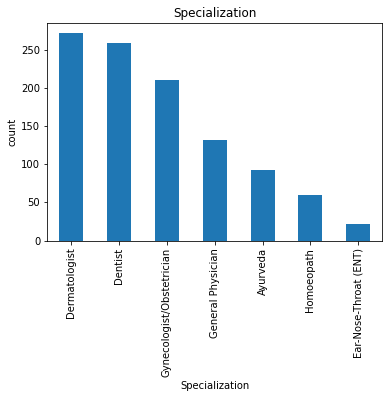

In [268]:
# Using Bar graph for Doctor_specialization
p["Specialization"].value_counts().plot.bar()
plt.xlabel('Specialization')
plt.ylabel('count')
plt.title('Specialization')
plt.show()


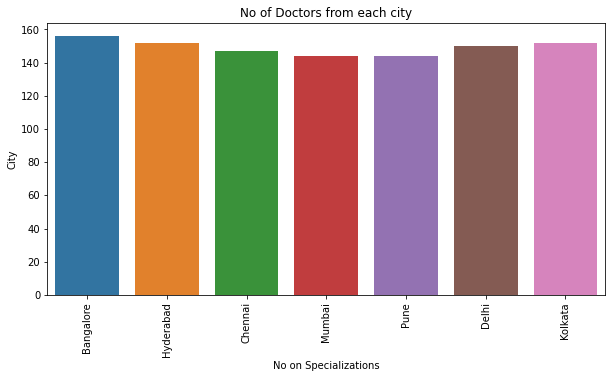

In [31]:
# Displaying the no of doctors in each city
plt.figure(figsize=(10,5))
sns.countplot(x = "City",data = p)
plt.title("No of Doctors from each city")
plt.xlabel("No on Specializations")
plt.ylabel("City")
plt.xticks(rotation = 90)
plt.show()

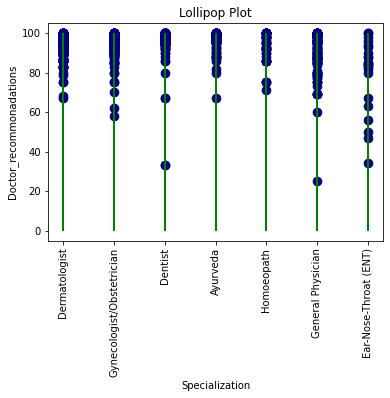

In [33]:
fig,ax = plt.subplots()
ax.vlines(x = p["Specialization"],ymin = 0,ymax = p["Doctor_recommondations"],color = "Green",linewidth = 2)
ax.scatter(x = p["Specialization"],y = p["Doctor_recommondations"],s = 75,color = "navy")
ax.set_xlabel("Specialization")
ax.set_ylabel("Doctor_recommonadations")
ax.set_title("Lollipop Plot")
plt.xticks(rotation = 90)
plt.show()

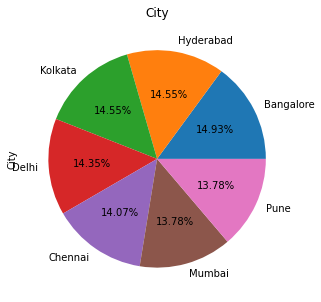

In [271]:
# Pie Chart for City
plt.figure(figsize=(5,5))
p['City'].value_counts().plot.pie(autopct="%.2f%%")
plt.title('City')
plt.show()

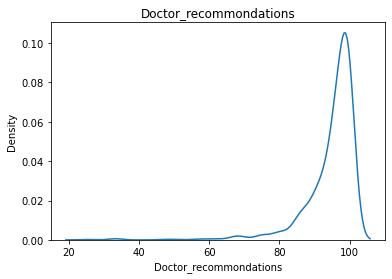

In [273]:
#  Density plot for Doctor_recommondations
sns.kdeplot(p['Doctor_recommondations'])
plt.title('Doctor_recommondations')
plt.show()

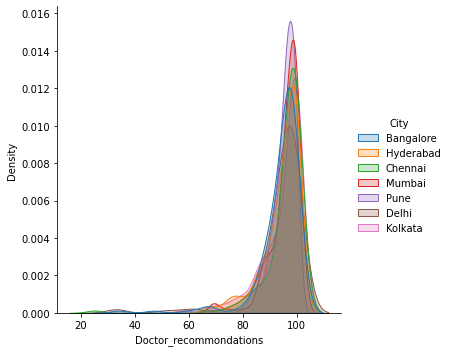

In [29]:
# Doctors sucess_rate in each city
sns.displot(p, x="Doctor_recommondations", hue="City", kind="kde", fill=True)

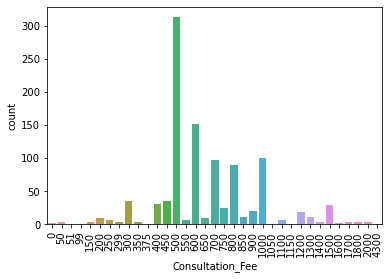

In [274]:
# Consultation_Fee
sns.countplot(p['Consultation_Fee'])
plt.xticks(rotation=90)
plt.show();


Text(0.5, 1.0, 'Experience')

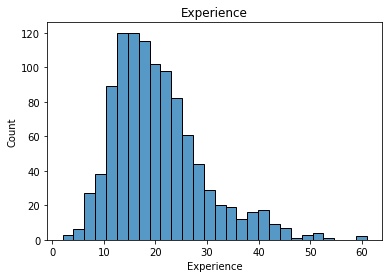

In [21]:
# Doctor_experience
sns.histplot(p["Experience"])
plt.title('Experience')

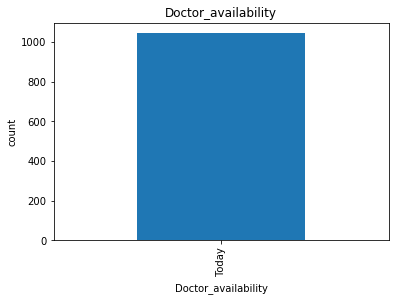

In [277]:
# Using Bar graph for Doctor_availability
p["Doctor_availability"].value_counts().plot.bar()
plt.xlabel('Doctor_availability')
plt.ylabel('count')
plt.title('Doctor_availability')
plt.show()


## Bivariate

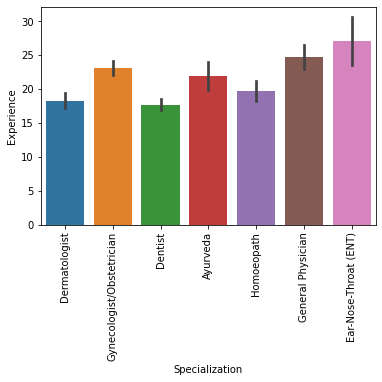

In [6]:
# Experience of doctors in each city
sns.barplot(x='Specialization',y='Experience',data=p)
plt.xticks(rotation=90)
plt.show()

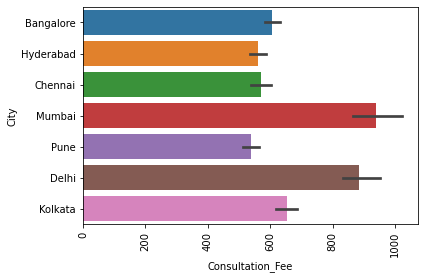

In [5]:
# Over all Consultation fee in each city
sns.barplot(y='City',x='Consultation_Fee',data=p,orient='h')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'City vs Specialization')

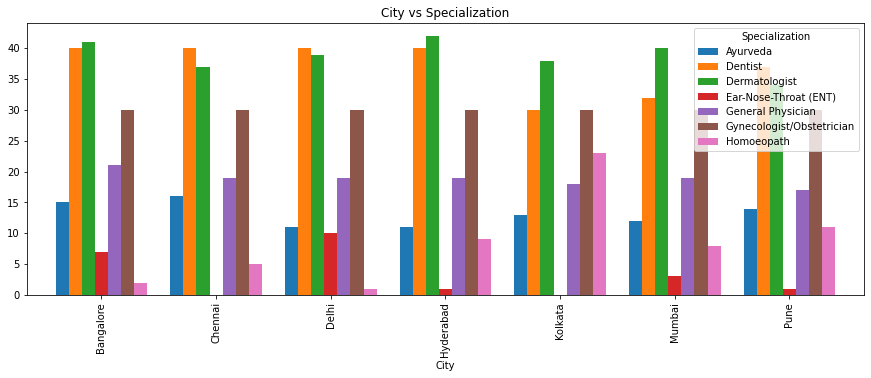

In [278]:
# No of specialists in each city
fig,ax=plt.subplots(figsize=(15,5))
pd.crosstab(p["City"],p["Specialization"]).plot(kind="bar",ax=ax,width=0.8)
plt.title('City vs Specialization')

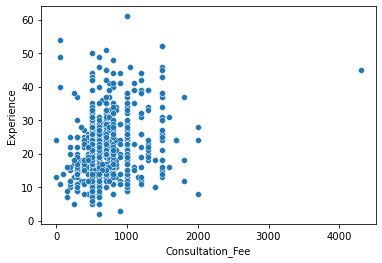

In [279]:
# Consultation fee based on their experience
sns.scatterplot(x='Consultation_Fee',y='Experience',data=p)
plt.show()

Text(0.5, 1.0, 'City vs Specialization')

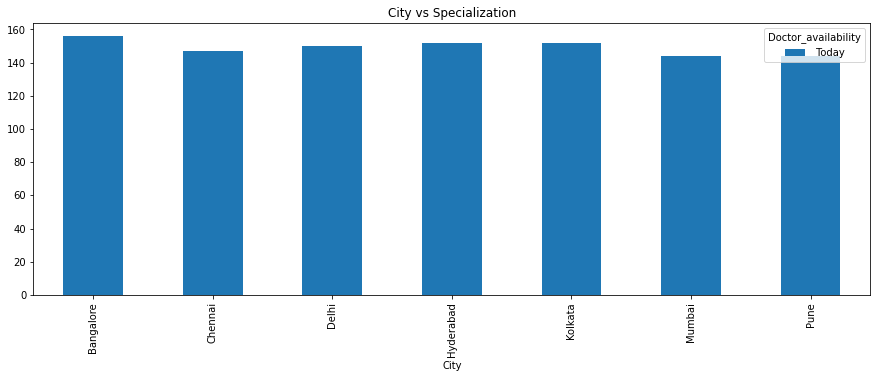

In [15]:
# Doctor availabilty in each city
fig,ax=plt.subplots(figsize=(15,5))
pd.crosstab(p["City"],p["Doctor_availability"]).plot(kind="bar",ax=ax,width=0.5)
plt.title('City vs Specialization')

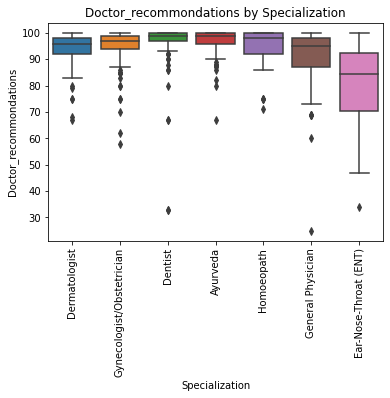

In [35]:
# specialists recommandation based on their success rate
sns.boxplot(x='Specialization',y="Doctor_recommondations",data = p)
plt.title("Doctor_recommondations by Specialization")
plt.ylabel("Doctor_recommondations")
plt.xlabel("Specialization")
plt.xticks(rotation=90)
plt.show()

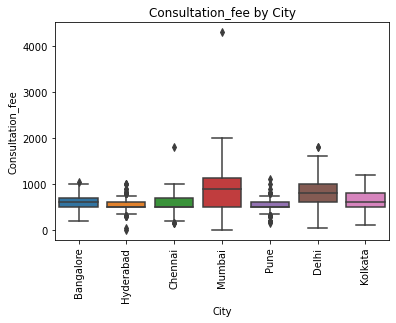

In [14]:
# Consultation fee in each city
sns.boxplot(x='City',y="Consultation_Fee",data=p)
plt.title("Consultation_fee by City")
plt.ylabel("Consultation_fee")
plt.xlabel("City")
plt.xticks(rotation=90)
plt.show()

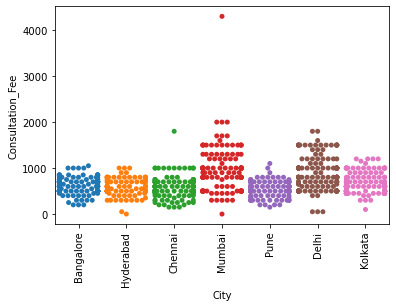

In [36]:
# Consultation fee in each city
import warnings
warnings.filterwarnings("ignore")
sns.swarmplot(x ='City', y ='Consultation_Fee', data = p)
plt.xticks(rotation = 90)
plt.show()

## Multivariate 

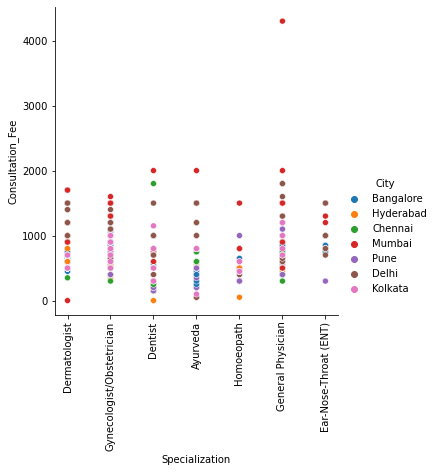

In [38]:
# Specialists consultation fee in each city
sns.relplot(x = "Specialization",y = "Consultation_Fee",hue = "City",data=p)
plt.xticks(rotation = 90)
plt.show()

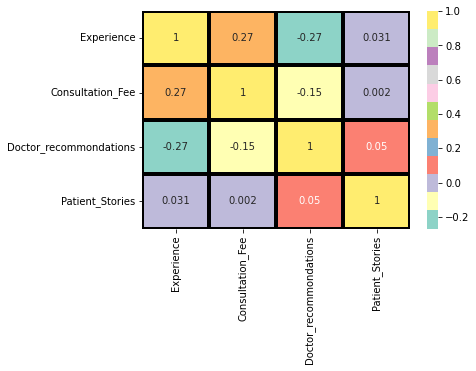

In [282]:
# correlation
sns.heatmap(p.corr(),annot=True,cmap="Set3",linecolor="black",linewidth=4)
plt.show();

# Conclusion

* As we Observe, In most of the cities "Dermatologists" are more in number.
* For each Specialist,Their Consultation fee is effected by their work experience.
       In our data,General Physician has more consultation fee.So that we can clearly say that he has        more experience compared to others.
* Based on the Sucess_rate of each doctor we can recommand to respective doctor based on our health conditions.
* By seeing the patient stories, Anyone  can get clear idea about each doctor how Effectively his/her treatment makes the patients speed recovery.